Test des réseaux de neuronnes 

In [1]:
import tensorflow

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd 
import re
import spacy
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from functools import reduce 
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly
# plotly.offline.init_notebook_mode(connected=True)

In [4]:
def transform (line):
    lang = re.findall("\([A-Z]{3}\)", line);
    if len(lang) != 0 :
        lang = lang[0];
        lang.replace("[\(\)]", "");
        text = line.replace(lang, "");
        return (lang, text)
    else :
        return None

def read_data():
    path  = r"C:\Users\ghile\Desktop\extraction_statistique_des_données";
    file  = open(path+r"\données\train.txt")
    data  = file.read()
    data  = data.split("\n")
    data = pd.DataFrame(list(map(transform,data)), columns=["lang","text"])
    data.dropna(inplace=True)
    data.lang = data.lang.apply(lambda x : re.findall("\w{3}",x)[0])
    fperl = Counter(data.lang)
    print("Nombre de messages par lang est :"+ str(fperl))
    return data ;


data  = read_data()

Nombre de messages par lang est :Counter({'GER': 900, 'TUR': 900, 'CHI': 900, 'TEL': 900, 'ARA': 900, 'SPA': 900, 'HIN': 900, 'JPN': 900, 'KOR': 900, 'FRE': 900, 'ITA': 900})


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train, test = train_test_split (data,test_size=1100,random_state=14)
# on a 900 texte pour chaque langue 
# 11 langues au total (label)
del data
train.text

4324     I do not agree with the statement that ` it i...
8104     Many academics believe that it is more import...
1153     In my opinoin , i agree with students to unde...
3425     The way of doing academic researches is alway...
1483     As I notice from our daily life , I can say t...
                              ...                        
7526     Regarding the statement , successful people t...
6471     It is likely that to specialize in one specif...
2454     With the change of technology and ways of liv...
9484     Actully i agree for the students to understan...
2667     Nowadays young people do not give enough time...
Name: text, Length: 8800, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.preprocessing import LabelEncoder;

victorizer = TfidfVectorizer(dtype=np.float32,ngram_range=(1,1));
label_encoder = LabelEncoder()

X = victorizer.fit_transform(train.text).toarray()
X_test = victorizer.transform(test.text).toarray()
y = label_encoder.fit_transform(train.lang)
y_test = label_encoder.fit_transform(test.lang)

In [10]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X.shape[1]]),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(11,activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [15]:
history = model.fit(X,y,epochs=500,validation_data=(X_test,y_test))

AttributeError: 'AxesSubplot' object has no attribute 'sety_lim'

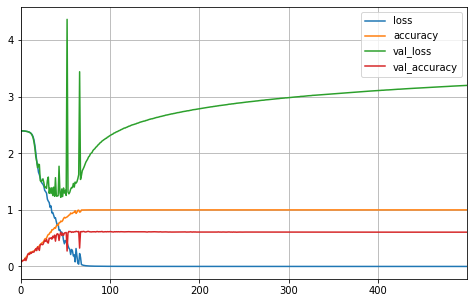

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().sety_lim(0,1)
plt.show()

In [14]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0    2.397944  0.086364  2.398218      0.085455
1    2.397443  0.100227  2.398055      0.080000
2    2.396833  0.104545  2.397635      0.098182
3    2.395807  0.105341  2.396635      0.107273
4    2.394646  0.116477  2.395838      0.108182
..        ...       ...       ...           ...
495  0.000089  1.000000  3.197811      0.606364
496  0.000088  1.000000  3.199391      0.606364
497  0.000088  1.000000  3.199689      0.606364
498  0.000088  1.000000  3.200940      0.606364
499  0.000088  1.000000  3.201404      0.606364

[500 rows x 4 columns]